<a href="https://colab.research.google.com/github/hongqin/deep-learning-illustrated/blob/master/shallow_net_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shallow Neural Network in Keras

Build a shallow neural network to classify MNIST digits

#### Load dependencies

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

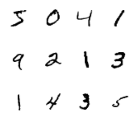

In [9]:
plt.figure(figsize=(2,2))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
X_valid.shape

(10000, 28, 28)

In [11]:
y_valid.shape

(10000,)

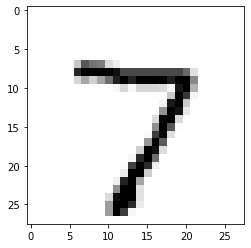

In [12]:
plt.imshow(X_valid[0], cmap='Greys')

In [13]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
y_valid[0]

7

#### Preprocess data

In [15]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [16]:
X_train /= 255
X_valid /= 255

In [17]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [19]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [20]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
(64*784)

50176

In [23]:
(64*784)+64

50240

In [24]:
(10*64)+10

650

#### Configure model

In [25]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

In [26]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0941 - accuracy: 0.1008 - val_loss: 0.0929 - val_accuracy: 0.1081
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.1089 - val_loss: 0.0917 - val_accuracy: 0.1168
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.1163 - val_loss: 0.0911 - val_accuracy: 0.1299
Epoch 4/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.1331 - val_loss: 0.0906 - val_accuracy: 0.1506
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.1521 - val_loss: 0.0902 - val_accuracy: 0.1691
Epoch 6/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1732 - val_loss: 0.0898 - val_accuracy: 0.1866
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.1970 - val_loss: 0.0895 - val_accuracy: 0.2101

In [27]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 965us/step - loss: 0.0275 - accuracy: 0.8666


[0.02747676707804203, 0.866599977016449]